# Your First Interferogram

This tutorial will guide you through the basics of processing interferometer data with prysm.  We will load a sample interferogram, mask the data, remove some low-order error, and compute basic specifications.

First we make some basic imports,

In [1]:
from prysm.interferogram import Interferogram
from prysm.sample_data import sample_files

To load data, we will use a method of the `Interferogram` class, which takes a path to the data:

In [2]:
path = sample_files('dat')
path

PosixPath('/Users/bdube/Open Source/prysm/prysm/../prysm-sampledata/valid_zygo_dat_file.dat')

In [12]:
interf = Interferogram.from_zygo_dat(path)

The first thing you might want to do is plot the data, which we can do with the `plot2d` method.  There are many optional arguments to control the formatting, but the defaults are fine for now.

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

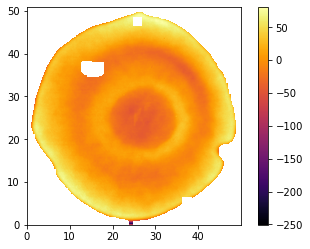

In [9]:
interf.plot2d()

The X and Y axes have units of mm, and z nm.  We can see some data dropout, and our origin is in the lower right hand corner.  Let's fix that and crop into the center 12 mm:

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

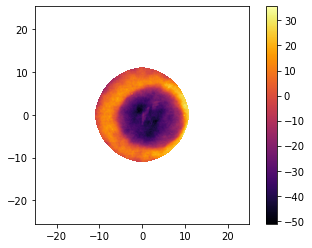

In [16]:
from prysm.geometry import circle

interf.recenter()
interf.mask(circle(12, interf.r))
interf.plot2d()

There's a lot of dead space around the data, so we'll crop that away to reduce the amount of data we have to process.  The prominent interferogram routines are NaN aware so the blank space is not automatically an issue.

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

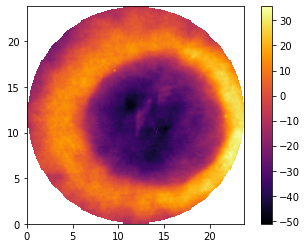

In [18]:
interf.crop()
interf.plot2d(interpolation='bilinear')

We changed the interpolation method to avoid some visual artifacts at the edges of the array.  Notice that `crop` reset the centering of the data as a side effect.  Now we'd like to remove a few low-order terms:

(<Figure size 432x288 with 2 Axes>, <AxesSubplot:>)

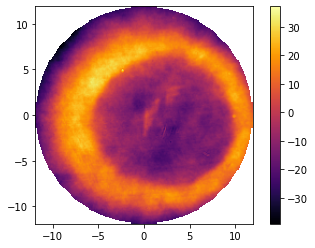

In [23]:
interf.recenter()
interf.remove_piston()
interf.remove_tiptilt()
interf.remove_power()
interf.plot2d(interpolation='bilinear')

And finally we can evaluate some basic statistics,

In [22]:
interf.pv, interf.rms # units are nm

(76.20195082847297, 14.263273830265103)

You can convert these values to reciprocal waves:

In [28]:
w = interf.wavelength * 1e3 # wavelength is in microns
w/interf.pv, interf.rms

(8.304249341652726, 14.263273830265103)

So, this area of this part is $\lambda/8$ PV and $\lambda/14$ RMS after rounding.

In summary, to do basic interferometer data processing:
    
- load an interferogram from disk using `Interferogram.from_zygo_dat`
- do any cropping and masking using functions from `prysm.geometry` or your own, based on the `x, y, r, t` attributes of the interferogram object and the `interf.mask` function.
- Evaluate statistics by using the computed properties of your interferogram

We will cover more topics in the [advanced](./Advanced-Interferogram-Processing.ipynb) tutorial.